# Ford GoBike System Data Exploration 
## by Shiying Wang

## Preliminary Wrangling

> This document explores a dataset containing attributes for approximately 520000 trip history in 2017.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df1 = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
# high-level overview of data shape and composition
print(df1.shape)
print(df1.dtypes)
print(df1.head(10))

(519700, 13)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
dtype: object
   duration_sec                start_time                  end_time  \
0         80110  2017-12-31 16:57:39.6540  2018-01-01 15:12:50.2450   
1         78800  2017-12-31 15:56:34.8420  2018-01-01 13:49:55.6170   
2         45768  2017-12-31 22:45:48.4110  2018-01-01 11:28:36.8830   
3         62172  2017-12-31 17:31:10.6360  2018-01-01 10:47:23.5310   
4         43603  2017-12-31 14:23:14.0010  2018-01-01 02:29:57.5710   
5          9226  2017-12-31 22:51:00.9180  2018-01-01 01:24:47.1660   
6          4507  2017

In [4]:
# descriptive statistics for numeric variables
print(df1.describe())

        duration_sec  start_station_id  start_station_latitude  \
count  519700.000000     519700.000000           519700.000000   
mean     1099.009521         95.034245               37.771653   
std      3444.146451         86.083078                0.086305   
min        61.000000          3.000000               37.317298   
25%       382.000000         24.000000               37.773492   
50%       596.000000         67.000000               37.783521   
75%       938.000000        139.000000               37.795392   
max     86369.000000        340.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            519700.000000   519700.000000         519700.000000   
mean               -122.363927       92.184041             37.771844   
std                   0.105573       84.969491              0.086224   
min                -122.444293        3.000000             37.317298   
25%                -122.411726       23.00000

### What is the structure of your dataset?

There are 519700 trips history in the dataset with 13 features (trip duration (seconds), start time and date, end time and date, start station ID, start station name, start station latitude, start station longitude, end station ID, end station name, end station latitude, end station longitude, bike ID, user type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)). 

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out the mean time of the trip duration and the impact of different user types and months on the trip duration.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that trip duation, start time and date, end time and date and user type will have effects on the trip duration.

## Univariate Exploration

> In this section, investigate distributions of individual variables. 

I'll start by looking at the mean of trip duration. 

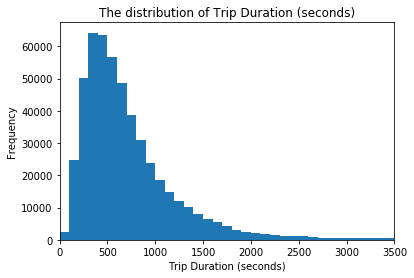

In [21]:
bin_edges = np.arange(0,df1['duration_sec'].max()+100,100)
plt.hist(data = df1, x = 'duration_sec', bins = bin_edges)
plt.xlim(0,3500)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('The distribution of Trip Duration (seconds)')
plt.show()

We can see from the above histogram, the distribution is right-skewed and the frequency is quite low after 2000 seconds, with peak between approximately 400 and 500. There is some people using the bike less than 100 seconds. It is clear to see that most of the data is set to the far left of the duration axes. To make the histogram clearer to see, we could limit x-value from 0 to 2000.

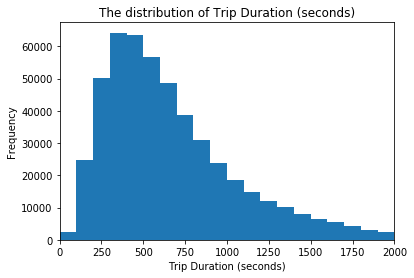

In [20]:
bin_edges = np.arange(0,df1['duration_sec'].max()+100,100)
plt.hist(data = df1, x = 'duration_sec', bins = bin_edges)
plt.xlim(0,2000)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Frequency')
plt.title('The distribution of Trip Duration (seconds)')
plt.show()

As we could see from the above modified histogram, the highest frequency appears between 250 and 750 seconds which is even higher than 60000 in the year of 2017. 

Next, let us look at the distribution of the user types. 

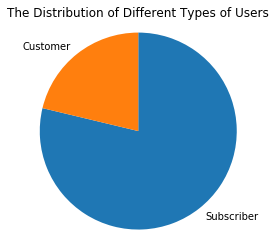

In [26]:
sorted_counts = df1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
    counterclock = False);
plt.axis('square')
plt.title('The Distribution of Different Types of Users')
plt.show();

From the pie chart above, we could see that more than 3/4 users are subscribers which are members and less than one quarter of the users are customers which are casual.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables.

To start off, we first look at the pairwise relationships present between features in the data.

In [8]:
# Extract month components of the start time
df1['start_time'] = pd.to_datetime(df1['start_time'])
df1['start_month'] = df1['start_time'].dt.month
df1['start_month'].value_counts()

10    108937
9      98558
11     95612
12     86539
8      83292
7      44073
6       2689
Name: start_month, dtype: int64

In [9]:
numeric_vars = ['duration_sec']
categoric_vars = ['start_month','user_type']

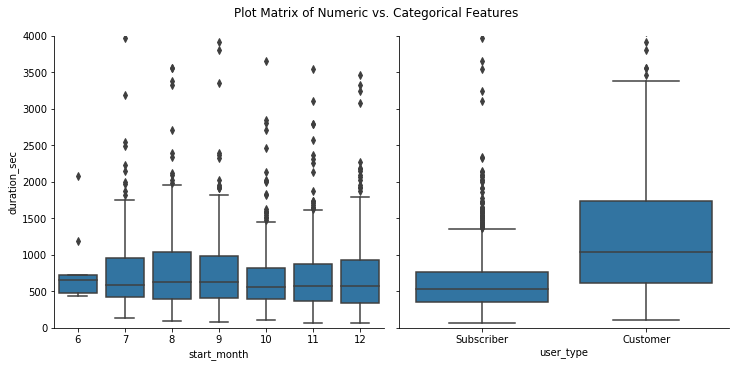

In [31]:
## plot matrix of numeric features against categorical features.
# can use a larger sample since there are fewer plots and they're simpler in nature.
samples = np.random.choice(df1.shape[0], 2000, replace = False);
df1_samp = df1.loc[samples,:];

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    ax = sb.boxplot(x, y, color = default_color)
    ax.set_ylim([0,4000]);


g = sb.PairGrid(data = df1_samp, y_vars = ['duration_sec'], x_vars = categoric_vars,
                height = 5, aspect = 1);
g.map(boxgrid);

plt.subplots_adjust(top=0.9);
g.fig.suptitle("Plot Matrix of Numeric vs. Categorical Features");
      
plt.show();

Interestingly, it appears that it is easier for us to see the relationship and tendency between the trip duration and the two categorical features(user types and start month) using the boxplot and limit the trip duration to 4000 sec. 
We could see that the customers seem to have higher trip duration than subscribers and median of the trip duration has a tendency of increasing. This will be worth investigating more later on, using the full data. 

Finally, let's look at relationships between the two categorical features.

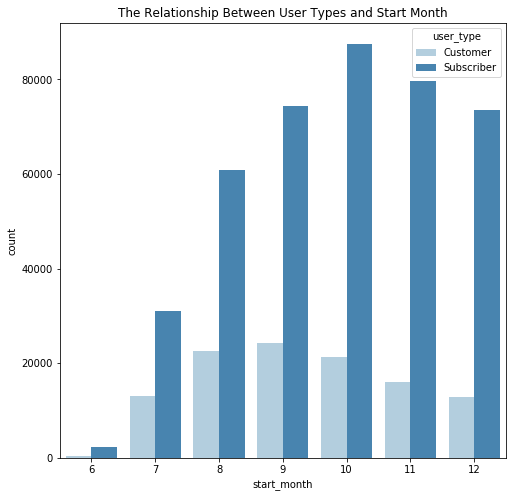

In [29]:

plt.figure(figsize = [8, 8])

#  start month vs. user types

ax = sb.countplot(data = df1, x = 'start_month', hue = 'user_type', palette = 'Blues')
plt.title('The Relationship Between User Types and Start Month')
plt.show();

From the countplot above, we could see that for customers, the peaks appear between August, September and October. Meanwhile, for subscribers, the peaks appear between October and November. 

With the preliminary look at bivariate relationships out of the way, we then want to dig into the relationship between trip duration and start month more.

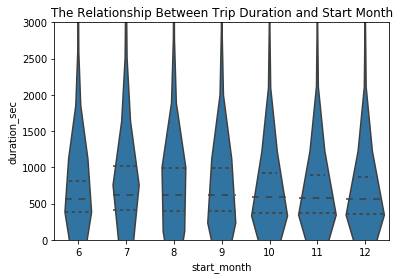

In [16]:
#plot the relationship between trip duration and start month using violin plot

base_color = sb.color_palette()[0]
ax = sb.violinplot(data = df1, x = 'start_month', y = 'duration_sec',color = base_color, 
              inner ='quartile' )
ax.set_ylim([0,3000])
plt.title('The Relationship Between Trip Duration and Start Month')

plt.show()

To make the plot clearer to see, we set the limit of the trip duration as 3000 seconds. 
From the violin plot above, we can see that there is no big differences between the 25% and median of the trip duration time. While, in month 10,11 and 12, users are more likely to use bike for a shorter trip which is approximately 400 seconds while in other months, users are relatively likely to use the bikes for 0 and 1000 seconds. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

We could see that the customers seem to have higher trip duration than subscribers and median of the trip duration has a tendency of increasing.  For customers, the peaks appear between August, September and October. Meanwhile, for subscribers, the peaks appear between October and November. There is no big differences between the 25% and median of the trip duration time. While, in month 10,11 and 12, users are more likely to use bike for a shorter trip which is approximately 400 seconds while in other months, users are relatively likely to use the bikes for 0 and 1000 seconds.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Customers and subscribers seem to have different preferences for using the bikes. For customers, they seem to prefer to use the bike in summer while for subscribers, they seem to prefer to use the bike in Autumn. That might happen because summer is the season for travelling. A lot of customers may use the bikes not for long-time use.


## Multivariate Exploration

> Create plots of three or more variables to investigate.

Since we have one numeric variable and two categorical variables, we could use the barplot.

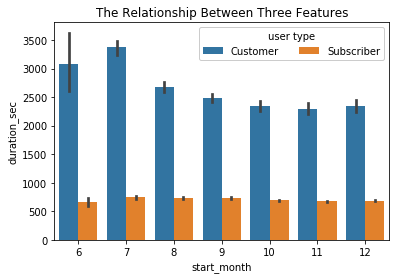

In [22]:
ax = sb.barplot(data = df1, x = 'start_month', y = 'duration_sec',
                hue = 'user_type')
ax.legend(loc = 1, ncol = 3, framealpha = 1, title = 'user type')
plt.title('The Relationship Between Three Features')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

For subscribers, the trip durations of different months almost stay the same, while for customers, they use the bikes longer in month 6 and 7 than other months. 

### Were there any interesting or surprising interactions between features?

For month 10, 11 and 12, two different users seem to remain the trip duration time.